In [9]:
import pandas as pd
#mengimpor dataset
header_list = ["text"]
data = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-svm_2-pre-non-predict.csv', names=header_list)
data

,text
0,psbb arti getar ekonomi dki niat jahat sikm ti...
1,jerit psbb terap rugi ekonomi segment bro rasa...
2,pikir bodoh transisi curva landai dampak
3,psbb total jokowi angguk sehat ekonomi citra a...
4,netizen pengaruh tidak tuju psbb total gubernu...
...,...
395,ekonomi psbb total tidak itu tumbuh ri kontrak...
396,turun ihsg level dagang buka selang menit para...
397,psbb total dki pemerintah wan abud culas terap...
398,pariwisata ekonomi kreatif produktif psbb tota...


In [10]:
import string
import re # import modul regular expression # regex for cleaning the tweets

def clean_text(reviews):
    all_reviews = list()
    lines = reviews["text"].values.tolist()
    for text in lines:
        text = re.sub("RT "," ", text)
        text = re.sub("@\\S+", " ", text)
        text = re.sub(r"http\S+", " ", text)
        text = re.sub("#\S+", " ", text)
        text = re.sub(r"\d+", " ", text) #menghapus angka dan reguler expression
        text = re.sub(r"[-!\"#$%&'()*+,./:;<=>?@\[\\\]_`{|}~ÃƒÂ¿]", " ", text)
        text = re.sub(r"\n", " ", text)
        text = re.sub(" +", " ",text)  
        text = text.strip()#remove whitespace    
        all_reviews.append(text)
    return all_reviews

all_reviews = clean_text(data)
print('Cleansing Data Result : \n') 
all_reviews[0:20]

Cleansing Data Result : 



['psbb arti getar ekonomi dki niat jahat sikm tidak akan total',
 'jerit psbb terap rugi ekonomi segment bro rasa dampak korona tidak ketat',
 'pikir bodoh transisi curva landai dampak',
 'psbb total jokowi angguk sehat ekonomi citra anies dag dig dug hutang tidak ada kasih merdeka',
 'netizen pengaruh tidak tuju psbb total gubernur dki alias wancovid bijak liar koordinasi bahaya sehat ekonomi regional',
 'anies bilang setia rencana lockdown psbb total halang dki arena buzzer serang tutup rezim bobrok ekonomi',
 'psbb sosiolog sedih dampak ekonomi sosial sangat besar dukung jilid tidak ada lawan cegah corona merajelela',
 'agam kritik layang pemerintah kait tangan covid efektivitas bijak psbb transparansi sedia apd sehat jamin lindung ekonomi dampak',
 'psbb total esok ahli ekonomi alami rugi',
 'junjung bilang sehat selamat ekonomi',
 'anies sepakat bijak psbb total gagal mutlak tangan covid dampak rugi pemerintah',
 'atur tidak bisa salah orang orang tidak tidak taat psbb taat bagus 

In [11]:
df=pd.DataFrame(all_reviews, columns=['text'])
data = pd.concat([df])
data

,text
0,psbb arti getar ekonomi dki niat jahat sikm ti...
1,jerit psbb terap rugi ekonomi segment bro rasa...
2,pikir bodoh transisi curva landai dampak
3,psbb total jokowi angguk sehat ekonomi citra a...
4,netizen pengaruh tidak tuju psbb total gubernu...
...,...
395,ekonomi psbb total tidak itu tumbuh ri kontrak...
396,turun ihsg level dagang buka selang menit para...
397,psbb total dki pemerintah wan abud culas terap...
398,pariwisata ekonomi kreatif produktif psbb tota...


In [12]:
from nltk.tokenize import word_tokenize
# ------ Tokenizing ---------
def word_tokenize_wrapper(sentiment_text):
    return word_tokenize(sentiment_text)

data['text'] = data['text'].apply(word_tokenize_wrapper)


print('Tokenizing Result : \n') 
print(data['text'].head(20))
print('\n\n\n')

Tokenizing Result : 

0     [psbb, arti, getar, ekonomi, dki, niat, jahat,...
1     [jerit, psbb, terap, rugi, ekonomi, segment, b...
2       [pikir, bodoh, transisi, curva, landai, dampak]
3     [psbb, total, jokowi, angguk, sehat, ekonomi, ...
4     [netizen, pengaruh, tidak, tuju, psbb, total, ...
5     [anies, bilang, setia, rencana, lockdown, psbb...
6     [psbb, sosiolog, sedih, dampak, ekonomi, sosia...
7     [agam, kritik, layang, pemerintah, kait, tanga...
8       [psbb, total, esok, ahli, ekonomi, alami, rugi]
9            [junjung, bilang, sehat, selamat, ekonomi]
10    [anies, sepakat, bijak, psbb, total, gagal, mu...
11    [atur, tidak, bisa, salah, orang, orang, tidak...
12    [pusing, makan, beban, dampak, ekonomi, terap,...
13    [airlangga, psbb, total, dki, timbul, ketidakp...
14    [psbb, bilang, total, ekonomi, tidak, jalan, p...
15    [sia, efek, angka, sadar, tak, tahu, jangkit, ...
16    [ekonomi, kaji, dampak, akibat, psbb, total, d...
17               [dampak, 

In [13]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('stopwords-id')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'krn', 'nya', 'nih', 'sih', 'tidak',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh',
                       '&amp', 'yah','toh','lah','ud','lw','wkwk',
                       'jleb','ne','wkw','xyz','rt','dong','haha',
                       'oalah','ish','hih','ngnt','ew','ups','jilidiii',
                       'hm','cuk','hadeh','au','ah','via','ae','hem','mah',
                       'wkwkwk','os','hadeuh','neg','cukz','seh','euy','so',
                       'cmiw','pls','bhahaha','bhaha','blak','blakan','jreng',
                       'caur','penya','b','blablabla','seh','ni','owalah','dhobol','lho',
                       'adadeh','dukung'])

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if not word in list_stopwords]
  

data['text'] = data['text'].apply(stopwords_removal) 


print(data['text'].head(20))

0                            [getar, niat, jahat, sikm]
1            [jerit, rugi, segment, bro, korona, ketat]
2                                [bodoh, curva, landai]
3     [angguk, sehat, citra, dag, dig, dug, hutang, ...
4     [netizen, pengaruh, alias, wancovid, liar, koo...
5     [setia, rencana, halang, arena, buzzer, serang...
6     [sosiolog, sedih, jilid, lawan, cegah, merajel...
7     [agam, kritik, layang, efektivitas, transparan...
8                                    [esok, ahli, rugi]
9                             [junjung, sehat, selamat]
10                       [sepakat, gagal, mutlak, rugi]
11               [taat, taat, bagus, kelas, gaya, beda]
12                                      [pusing, beban]
13            [airlangga, timbul, ketidakpastian, mati]
14                                              [paham]
15      [sia, sadar, jangkit, bingung, keringat, tutup]
16                                        [kaji, puruk]
17                                             [

In [14]:
def join_text_list(text):
    return ' '.join(text)

data['text'] = data['text'].apply(join_text_list)
print(data['text'].head(10))

0                                getar niat jahat sikm
1                  jerit rugi segment bro korona ketat
2                                   bodoh curva landai
3        angguk sehat citra dag dig dug hutang merdeka
4    netizen pengaruh alias wancovid liar koordinas...
5    setia rencana halang arena buzzer serang tutup...
6          sosiolog sedih jilid lawan cegah merajelela
7    agam kritik layang efektivitas transparansi se...
8                                       esok ahli rugi
9                                junjung sehat selamat
Name: text, dtype: object


In [15]:
df=pd.DataFrame(data['text'])
df.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-svm_2-pre-non-predict-predict.csv',index = False, header=None)

In [17]:
import pandas as pd
#mengimpor dataset
header_list = ["text","label","prediction"]
data = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-svm_2-pre-non-predict-predict.csv', names=header_list)
data

,text,label,prediction
0,getar niat jahat sikm,0,0
1,jerit rugi segment bro korona ketat,0,0
2,bodoh curva landai,0,0
3,angguk sehat citra dag dig dug hutang merdeka,0,0
4,netizen pengaruh alias wancovid liar koordinas...,0,0
...,...,...,...
395,tumbuh ri kontraksi fundamental kropos crash f...,0,0
396,turun ihsg level dagang selang menit parah,0,0
397,wan abud culas koordinasi hancur target bima a...,0,0
398,pariwisata kreatif produktif,1,1


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
from wordcloud import WordCloud, ImageColorGenerator

df = data[data["prediction"]==0]
df.head()

words = ' '.join(df['text'])
words

'getar niat jahat sikm jerit rugi segment bro korona ketat bodoh curva landai angguk sehat citra dag dig dug hutang merdeka netizen pengaruh alias wancovid liar koordinasi bahaya sehat regional setia rencana halang arena buzzer serang tutup rezim bobrok sosiolog sedih jilid lawan cegah merajelela esok ahli rugi sepakat gagal mutlak rugi pusing beban airlangga timbul ketidakpastian mati paham sia sadar jangkit bingung keringat tutup ambyar keliru putus walikota bogor detail eksekusi koordinasi tanggung patuh keluh longgar bebas asli kesal protokol sehat ngaruh cerita anggap selesai cerita buzzer tri kritik rugi resesi normal cegah wabah ketat tindak langgar prokes mati bisnis tanggulang hotel sepi keluh syukur pusing wabah gila nyungsep batal ancam rusak jatuh pimpin boneka komunis peduli tumpang krl turun beneran pahit pribadi penuh mikir ulang tutup phk daya turun giat karyawan bangkrut ketat investasi reksadana jilid tumbuh kuartal iii terjun jurang gimana mati sebar tekan gila ihsg 

In [18]:
#Library untuk keperluan visualisasi WordCloud dan Generator warna visualnya
from wordcloud import WordCloud, ImageColorGenerator

In [19]:
df = data[data["prediction"]==0] #menampilkan data dengan prediksi 0 atau negative
df.head()
words = ' '.join(df['text']) #gabungkan semua komentar atau kata kata menjadi satu kesatuan kalimat

,text,label,prediction
0,getar niat jahat sikm,0,0
1,jerit rugi segment bro korona ketat,0,0
2,bodoh curva landai,0,0
3,angguk sehat citra dag dig dug hutang merdeka,0,0
4,netizen pengaruh alias wancovid liar koordinas...,0,0


In [21]:
"""
setting tampilan WordCloud yang mencakup warna latar belakang, maksimal kata kata yang ditampilkan, maksimal ukuran gambar,
ukuran pengacakan gambar, lebar, tinggi, dan mengenerate berdasarkan variabel words yang sudah didefinisikan sebelumnya
"""
wc_negative = WordCloud(background_color="white",
               max_words=50, max_font_size=256,
               random_state=42, width=1000,
               height=1000).generate(str(words))

In [22]:
"""
Bagian ini digunakan untuk pengaturan function warna yang mencakup kata, ukuran huruf, posisi, dan arah penempatan huruf, serta
warna yang akan digunakan dan pengacakan jenis warna yang ditampilkan
"""
import random
def negative(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(362, 82%%, %d%%)" % random.randint(30, 70) #menghasilkan jenis intensitas kecerahan warna secara random untuk 
                                                            #kata2 yang ditampilan

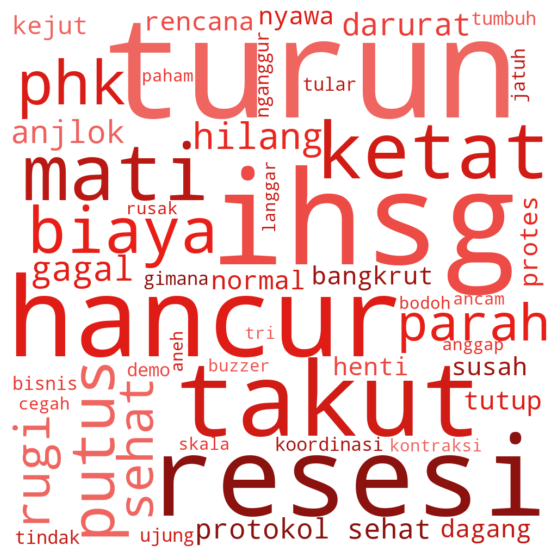

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(wc_negative.recolor
           (color_func=negative, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()
#wordcloud.to_file("Negatif.png")

In [25]:
df = data[data["prediction"]==1]
df.head()

,text,label,prediction
7,agam kritik layang efektivitas transparansi se...,1,1
9,junjung sehat selamat,1,1
11,taat taat bagus kelas gaya beda,1,1
16,kaji puruk,1,1
19,lelah non lawan sehat prioritas virus kenal,1,1


In [26]:
words = ' '.join(df['text'])

In [27]:
wc_positive = WordCloud(background_color="white",
               max_words=50, max_font_size=256,
               random_state=42, width=1000,
               height=1000).generate(str(words))

In [28]:
import random
def positive(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 82%%, %d%%)" % random.randint(30, 70)

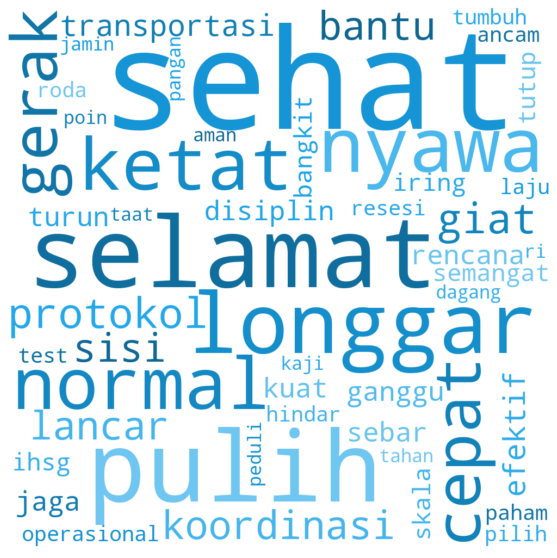

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(wc_positive.recolor
           (color_func=positive, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()
#wordcloud.to_file("Positif.png")

In [19]:
import pandas as pd
#mengimpor dataset
header_list = ["text","label","prediction"]
data = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/hasil-prediksi-svm-non-predict-predict.csv', names=header_list)
data

,text,label,prediction
0,getar niat jahat sikm,0,0
1,jerit rugi segment bro korona ketat,0,0
2,bodoh curva landai,0,0
3,angguk sehat citra dag dig dug hutang merdeka,0,0
4,netizen pengaruh alias wancovid liar koordinas...,0,0
...,...,...,...
395,tumbuh ri kontraksi fundamental kropos crash f...,0,0
396,turun ihsg level dagang selang menit parah,0,0
397,wan abud culas koordinasi hancur target bima a...,0,0
398,pariwisata kreatif produktif,1,1


In [26]:
words_in_tweet = [tweet.lower().split() for tweet in data["text"]]
words_in_tweet[:2]

[['getar', 'niat', 'jahat', 'sikm'],
 ['jerit', 'rugi', 'segment', 'bro', 'korona', 'ketat']]

In [28]:
import itertools
import collections
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
counts_all_words = collections.Counter(all_words)

counts_all_words.most_common(15)

[('sehat', 59),
 ('turun', 28),
 ('ketat', 25),
 ('ihsg', 24),
 ('dukung', 19),
 ('selamat', 19),
 ('mati', 18),
 ('resesi', 18),
 ('pulih', 18),
 ('nyawa', 17),
 ('normal', 16),
 ('protokol', 15),
 ('longgar', 14),
 ('hancur', 14),
 ('takut', 14)]

In [50]:
clean_tweets_all_world = pd.DataFrame(counts_all_words.most_common(15),
                             columns=['words', 'count'])

clean_tweets_all_world.head()

,words,count
0,sehat,59
1,turun,28
2,ketat,25
3,ihsg,24
4,dukung,19


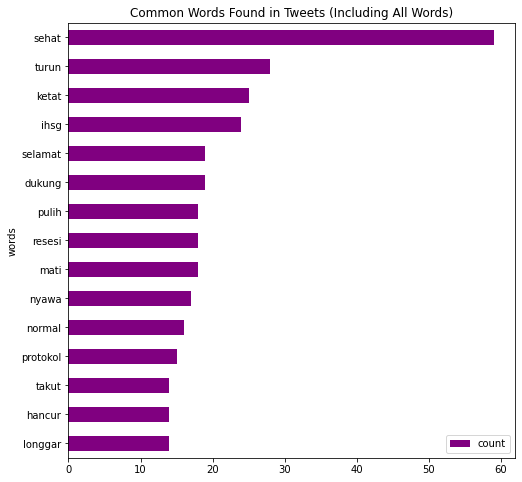

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_all_world.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

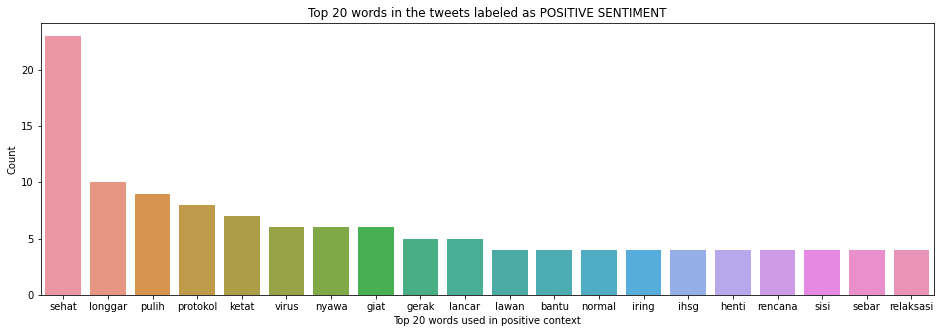

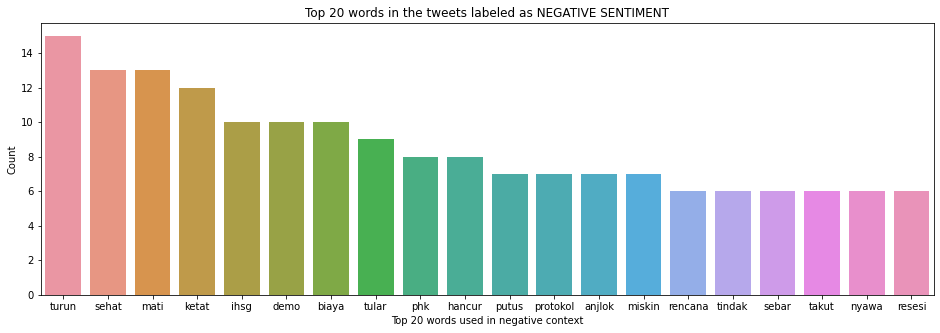

In [52]:
import nltk

pos = data[data['label'] == 1]
neg = data[data['label'] == 0]
pos_sentiment_words = ''.join([word for word in pos['text']]) #words from the tweets that are positive
neg_sentiment_words = ''.join([word for word in neg['text']]) ##words from the tweets that are negative

#top 20 words on positive tweets
list_pos_words = [ x for x in pos_sentiment_words.split()] #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_pos_words) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())}) #data frame of words and count

# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel= 'Top 20 words used in positive context')
plt.title("Top 20 words in the tweets labeled as POSITIVE SENTIMENT")
plt.show()

#top 20 words on negative tweets
list_neg_words = [ x for x in neg_sentiment_words.split()]   #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_neg_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())})  #data frame of words and count

# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 20 words used in negative context')
plt.title("Top 20 words in the tweets labeled as NEGATIVE SENTIMENT")
plt.show()